Text(0.5, 1.0, 'Original data')

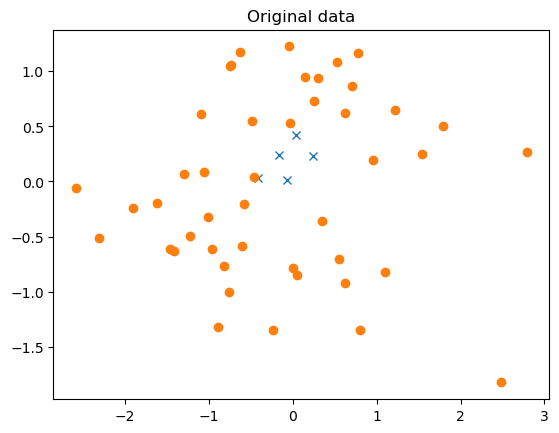

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
mean = [0, 0]
covariance = [[1,0], [0,1]]
#data_zero = np.random.multivariate_normal(mean, covariance, n_samples)
#data_one = np.random.multivariate_normal(mean, covariance, n_samples)
#data = np.append(data_zero, data_one, axis=0)

n_samples = 50
data = np.random.multivariate_normal(mean, covariance, n_samples)
dummy = np.ones([n_samples,1])

data= np.append(data, dummy, axis=1)

labels = np.zeros(n_samples)
for t in range(n_samples):
    if (np.abs(data[t,0]) + np.abs(data[t,1]) > 0.5):
        labels[t] = 1
        
plt.plot(data[labels==0, 0], data[labels==0,1], 'x')
plt.plot(data[labels==1, 0], data[labels==1,1], 'o')
plt.title("Original data")


Text(0.5, 1.0, 'Linear transform')

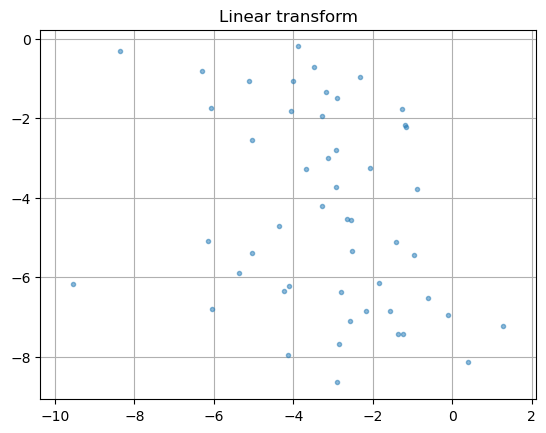

In [99]:
# A linear transformation
n_dim = 4
A = 2*np.random.normal(size=[3, n_dim])

z = np.dot(data, A)

plt.plot(z[:,0], z[:,1], '.', alpha=0.5)
plt.axis('equal')
plt.grid()
plt.title("Linear transform")

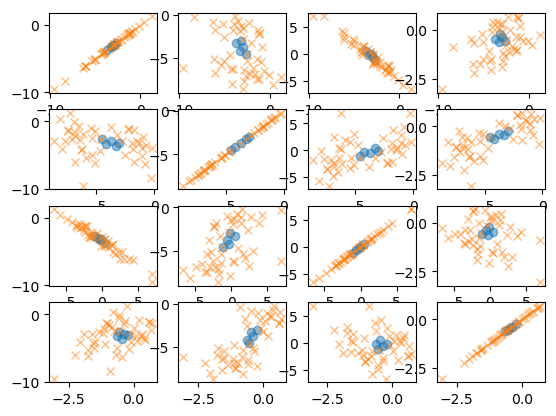

In [100]:
# Transform the final layer
fig, axs = plt.subplots(nrows=n_dim, ncols=n_dim)
for i in range(n_dim):
    for j in range(n_dim):
        axs[i,j].plot(z[labels==0,i], z[labels==0,j], 'o', alpha=0.5)
        axs[i,j].plot(z[labels==1,i], z[labels==1,j], 'x', alpha=0.5)

Text(0.5, 1.0, 'Sigmoid')

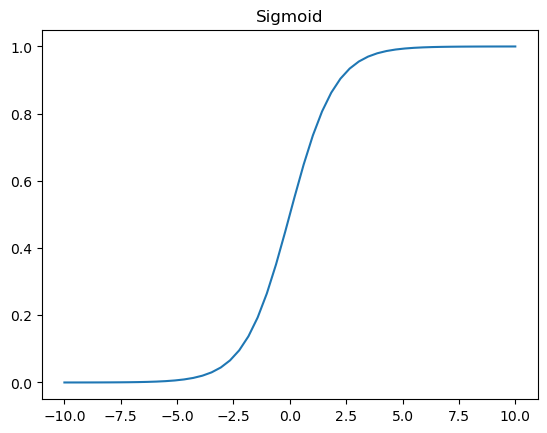

In [101]:
# A non-linear transformation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10,10)
plt.plot(x, sigmoid(x))
plt.title("Sigmoid")

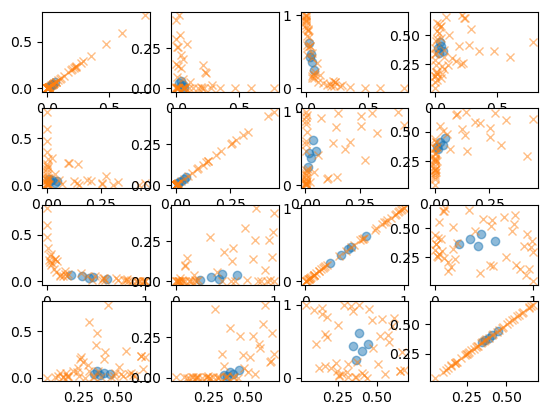

In [102]:
# Transform the final layer
y = sigmoid(z)

fig, axs = plt.subplots(nrows=n_dim, ncols=n_dim)
for i in range(n_dim):
    for j in range(n_dim):
        axs[i,j].plot(y[labels==0,i], y[labels==0,j], 'o', alpha=0.5)
        axs[i,j].plot(y[labels==1,i], y[labels==1,j], 'x', alpha=0.5)


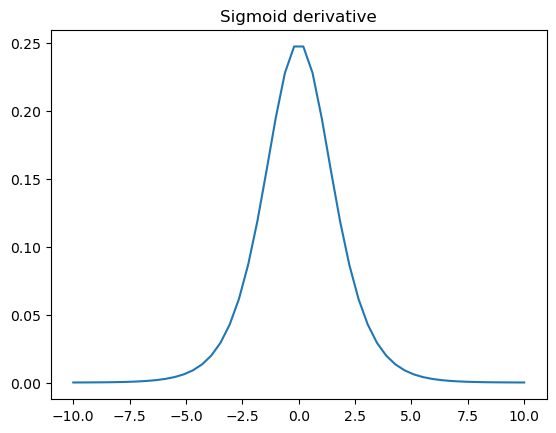

In [29]:
# derivative
def sigmoid_derivative(x):
    return np.exp(-x) / np.power((1 + np.exp(-x)),2)

# plot the derivative
x = np.linspace(-10,10)
plt.plot(x, sigmoid_derivative(x))
plt.title("Sigmoid derivative")
plt.show()